In [22]:
import os
import requests
import numpy as np
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
from tabulate import tabulate
%matplotlib inline

In [2]:
# Load .env environment variables
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [15]:
from alpaca_trade_api.rest import REST, TimeFrame

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")
df = alpaca.get_bars("AMZN", TimeFrame.Day, "2020-10-08", "2021-10-29", adjustment='raw').df
df.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2020-10-08 04:00:00+00:00,3226.00,3233.2944,3174.990,3190.55,3179115,147556,3196.409664
2020-10-09 04:00:00+00:00,3210.00,3288.9900,3197.830,3286.65,4908056,213815,3260.388241
2020-10-12 04:00:00+00:00,3348.50,3496.2400,3339.550,3442.93,8365356,360555,3434.663913
2020-10-13 04:00:00+00:00,3467.09,3492.3800,3424.217,3443.63,5746337,255477,3459.646446
2020-10-14 04:00:00+00:00,3447.00,3464.8800,3340.000,3363.71,5828916,269537,3387.021649


In [16]:
# Drop irrelevant columns from dataframe

df.drop(columns=["open", "high", "low", "volume", "trade_count", "vwap"], inplace=True)
df.head()

,close
timestamp,
2020-10-08 04:00:00+00:00,3190.55
2020-10-09 04:00:00+00:00,3286.65
2020-10-12 04:00:00+00:00,3442.93
2020-10-13 04:00:00+00:00,3443.63
2020-10-14 04:00:00+00:00,3363.71


In [17]:
def rsi(df, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df['close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [18]:
rsi(df).dropna()

timestamp
2020-10-28 04:00:00+00:00    42.484129
2020-10-29 04:00:00+00:00    48.057276
2020-10-30 04:00:00+00:00    34.866308
2020-11-02 05:00:00+00:00    33.094504
2020-11-03 05:00:00+00:00    37.815056
                               ...    
2021-10-25 04:00:00+00:00    46.327107
2021-10-26 04:00:00+00:00    52.090208
2021-10-27 04:00:00+00:00    53.669529
2021-10-28 04:00:00+00:00    58.519493
2021-10-29 04:00:00+00:00    50.685923
Name: close, Length: 254, dtype: float64

<AxesSubplot:xlabel='timestamp'>

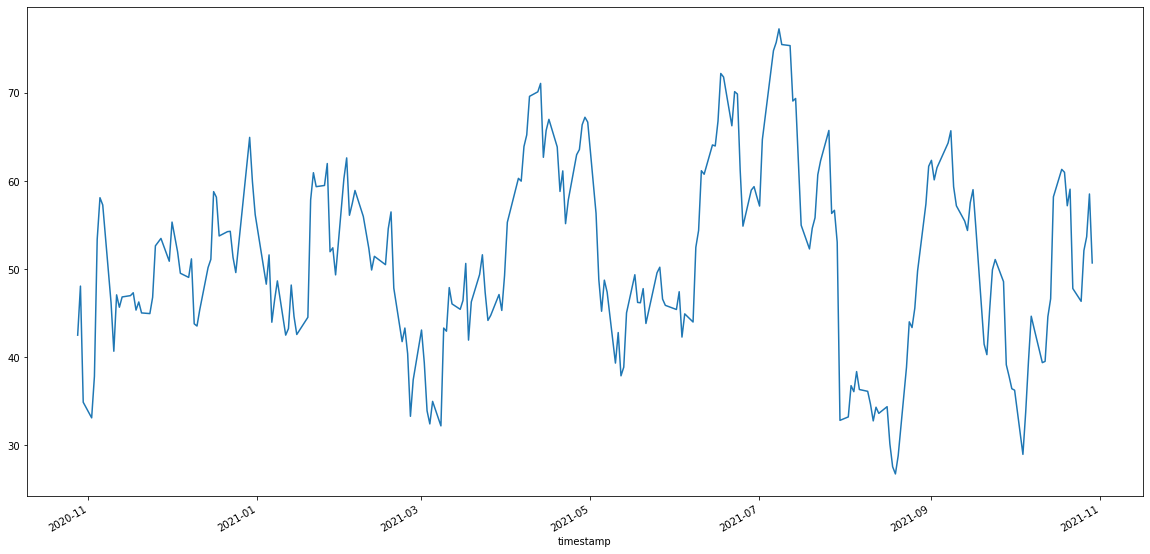

In [23]:
rsi(df).plot(figsize=(20,10))